# Problem Set 1 CS129.18

The following problem set will revolve around hourly Philippine weather data observations from 1978 to 2018 sourced from NOAA (National Oceanic and Atmospheric Administration). 

The dataset `PH_Weather_v1.csv` has **11** columns. The columns are described as follows.

* **datetime** maps to a YYYYMMDDSSSS string datetime format.
* **wind_direction** represents the recorded compass direction of the wind. 
* **wind_speed** is the wind speed recorded in MPH.
* **gust_speed** is the gust speed recorded in MPH. NAN if no recording.
* **sea_level_pressure** is sea level pressure in millibars estimated to the nearest tenth.
* **temperature** is the recorded temperature in celsius.
* **altitude** is the station altimeter recording in inches. NAN if no recording.
* **precipitation** is the station hourly precipitation report in inches. NAN if no recording.
* **clouds** is the station observed cloud report.
    * CLR-CLEAR 
    * SCT-SCATTERED
    * BKN-BROKEN
    * OVC-OVERCAST, 
    * OBS-OBSCURED
    * POB-PARTIAL OBSCURATION 
* **visibility** is the station observed visibility in miles
* **humidity** is the station observed relative humidity

## Requirements


>Atmospheric Science is a complex system that works with factors that interact with each other. We might be able use these variables to estimate the value of one of the key indicators: Temperature.

Using the lessons on Linear Regression I and II, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. What is the dimensionality or shape of the data? ( 1pt )

2. What is mean temperature for the year 2017? ( 3pts )

3. Solve for the beta coefficients for the columns that you can use in your dataset to predict temperature. ( 4pts )

4. Show the relationship between the variable with the highest beta coefficient and temperature (Use a plot). ( 5pts )

5. Solve for the Mean Squared Error of your predicted temperature against the actual temperature. ( 2pts )

6. Solve for the R^2 score of the linear model used to predict temperature. ( 2pts )

7. Identify if the model is a good model and why. ( 3pts )



-----



In [2]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("data/PH_Weather_v1.csv")

In [4]:
df.head()

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88


In [5]:
df.shape

(90565, 11)

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%S')
# df.head(5)

In [7]:
df['year'] = df['datetime'].dt.year
# df.head(5)

In [8]:
yearly_df = df.groupby(['year', 'datetime']).mean()
yearly_df

wind_direction  wind_speed  gust_speed  \
year datetime                                                      
1978 1978-09-14 03:00:00           160.0         2.0         NaN   
     1978-10-02 15:00:00             0.0         0.0         NaN   
     1978-10-25 21:00:00           360.0         9.0         NaN   
     1978-10-26 00:00:00           360.0        21.0         NaN   
     1978-11-13 15:00:00             0.0         0.0         NaN   
...                                  ...         ...         ...   
2018 2018-09-01 09:00:00             0.0         0.0         NaN   
     2018-09-01 12:00:00            70.0         4.0         NaN   
     2018-09-01 15:00:00            70.0         4.0         NaN   
     2018-09-01 18:00:00           340.0         7.0         NaN   
     2018-09-01 21:00:00            40.0         4.0         NaN   

                          sea_level_pressure  temperature  altitude  \
year datetime                                                         
1978 1978-09-14 03:00:00              1007.7         30.0       NaN   
     1978-10-02 15:00:00              1011.3         26.0       NaN   
     1978-10-25 21:00:00              1004.1         26.0       NaN   
     1978-10-26 00:00:00              1006.3         26.0       NaN   
     1978-11-13 15:00:00              1010.1         26.0       NaN   
...                                      ...          ...       ...   
2018 2018-09-01 09:00:00              1007.0         28.0       NaN   
     2018-09-01 12:00:00              1008.1         28.0       NaN   
     2018-09-01 15:00:00              1008.9         27.0       NaN   
     2018-09-01 18:00:00              1007.9         27.0       NaN   
     2018-09-01 21:00:00              1007.1         26.0       NaN   

                          precipitation  visibility  humidity  
year datetime                                                  
1978 1978-09-14 03:00:00            NaN        15.6      0.75  
     1978-10-02 15:00:00            NaN         6.2      0.94  
     1978-10-25 21:00:00            NaN         6.2      0.80  
     1978-10-26 00:00:00            NaN         6.2      0.80  
     1978-11-13 15:00:00            NaN        11.2      0.88  
...                                 ...         ...       ...  
2018 2018-09-01 09:00:00            NaN         7.5      0.80  
     2018-09-01 12:00:00            NaN         7.5      0.86  
     2018-09-01 15:00:00            NaN         7.5      0.80  
     2018-09-01 18:00:00            NaN         7.5      0.77  
     2018-09-01 21:00:00            NaN         7.5      0.80  

[90565 rows x 9 columns]

In [9]:
year_2017_df = yearly_df.loc[2017]
year_2017_df

,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,visibility,humidity
datetime,,,,,,,,,
2017-01-01 00:00:00,360.0,7.0,NaN,1013.9,25.0,NaN,NaN,7.5,0.91
2017-01-01 03:00:00,90.0,7.0,NaN,1011.8,28.0,NaN,NaN,7.5,0.66
2017-01-01 06:00:00,40.0,9.0,NaN,1010.7,30.0,NaN,NaN,7.5,0.50
2017-01-01 09:00:00,20.0,9.0,NaN,1011.1,28.0,NaN,NaN,7.5,0.66
2017-01-01 12:00:00,20.0,2.0,NaN,1012.9,27.0,NaN,NaN,7.5,0.69
...,...,...,...,...,...,...,...,...,...
2017-12-31 09:00:00,70.0,9.0,NaN,1009.6,28.0,NaN,NaN,7.5,0.49
2017-12-31 12:00:00,40.0,4.0,NaN,1011.5,26.0,NaN,NaN,7.5,0.66
2017-12-31 15:00:00,0.0,0.0,NaN,1011.5,26.0,NaN,NaN,7.5,0.66


In [10]:
year_2017_df['temperature'].mean()

27.93335635359116

In [11]:
from sklearn.linear_model import LinearRegression

X = pd.read_csv("data/PH_Weather_v1.csv")
X

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,BKN,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,OVC,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,BKN,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,OVC,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,BKN,11.2,0.88
...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,BKN,7.5,0.80
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,BKN,7.5,0.86
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,BKN,7.5,0.80
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,BKN,7.5,0.77


In [12]:
X = X.drop(X[X['clouds'] == '***'].index)
df = df.drop(df[df['clouds'] == '***'].index)
X['clouds'].replace({
        'CLR': 0,
        'SCT': 1,
        'BKN': 2,
        'OVC': 3,
        'POB': 4,
        'OBS': 5
    }, 
    inplace=True
)
X

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity
0,197809140300,160,2,NaN,1007.7,30,NaN,NaN,2,15.6,0.75
1,197810021500,0,0,NaN,1011.3,26,NaN,NaN,3,6.2,0.94
2,197810252100,360,9,NaN,1004.1,26,NaN,NaN,2,6.2,0.80
3,197810260000,360,21,NaN,1006.3,26,NaN,NaN,3,6.2,0.80
4,197811131500,0,0,NaN,1010.1,26,NaN,NaN,2,11.2,0.88
...,...,...,...,...,...,...,...,...,...,...,...
90560,201809010900,0,0,NaN,1007.0,28,NaN,NaN,2,7.5,0.80
90561,201809011200,70,4,NaN,1008.1,28,NaN,NaN,2,7.5,0.86
90562,201809011500,70,4,NaN,1008.9,27,NaN,NaN,2,7.5,0.80
90563,201809011800,340,7,NaN,1007.9,27,NaN,NaN,2,7.5,0.77


In [13]:
X['datetime'] = pd.to_datetime(X['datetime'], format='%Y%m%d%H%S')
X['month'] = df['datetime'].dt.month
# X['day'] = df['datetime'].dt.day
X['hour'] = df['datetime'].dt.hour
X

,datetime,wind_direction,wind_speed,gust_speed,sea_level_pressure,temperature,altitude,precipitation,clouds,visibility,humidity,month,hour
0,1978-09-14 03:00:00,160,2,NaN,1007.7,30,NaN,NaN,2,15.6,0.75,9,3
1,1978-10-02 15:00:00,0,0,NaN,1011.3,26,NaN,NaN,3,6.2,0.94,10,15
2,1978-10-25 21:00:00,360,9,NaN,1004.1,26,NaN,NaN,2,6.2,0.80,10,21
3,1978-10-26 00:00:00,360,21,NaN,1006.3,26,NaN,NaN,3,6.2,0.80,10,0
4,1978-11-13 15:00:00,0,0,NaN,1010.1,26,NaN,NaN,2,11.2,0.88,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90560,2018-09-01 09:00:00,0,0,NaN,1007.0,28,NaN,NaN,2,7.5,0.80,9,9
90561,2018-09-01 12:00:00,70,4,NaN,1008.1,28,NaN,NaN,2,7.5,0.86,9,12
90562,2018-09-01 15:00:00,70,4,NaN,1008.9,27,NaN,NaN,2,7.5,0.80,9,15
90563,2018-09-01 18:00:00,340,7,NaN,1007.9,27,NaN,NaN,2,7.5,0.77,9,18


In [14]:
X = X.drop([
    'temperature',
    'gust_speed',
    'altitude',  
    'precipitation',
    'datetime'
    ], axis=1
)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90463 entries, 0 to 90564
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wind_direction      90463 non-null  int64  
 1   wind_speed          90463 non-null  int64  
 2   sea_level_pressure  90463 non-null  float64
 3   clouds              90463 non-null  int64  
 4   visibility          90463 non-null  float64
 5   humidity            90463 non-null  float64
 6   month               90463 non-null  int64  
 7   hour                90463 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 6.2 MB


In [15]:
linear_model = LinearRegression()
linear_model.fit(X, df['temperature'])

LinearRegression()

In [16]:
print(f"Coefficient values{linear_model.coef_}")

Coefficient values[ 1.07677410e-03  7.11925554e-02 -4.57799834e-05  8.98690750e-02
  1.03877617e-01 -1.08861676e+01  9.13332143e-02 -5.26992876e-02]


In [17]:
len(linear_model.coef_)

8

In [18]:
pd.DataFrame(list(zip(X.columns, linear_model.coef_)))

,0,1
0,wind_direction,0.001077
1,wind_speed,0.071193
2,sea_level_pressure,-0.000046
3,clouds,0.089869
4,visibility,0.103878
5,humidity,-10.886168
6,month,0.091333
7,hour,-0.052699


Text(0.5, 1.0, 'Relationship between Humidity and Temperature')

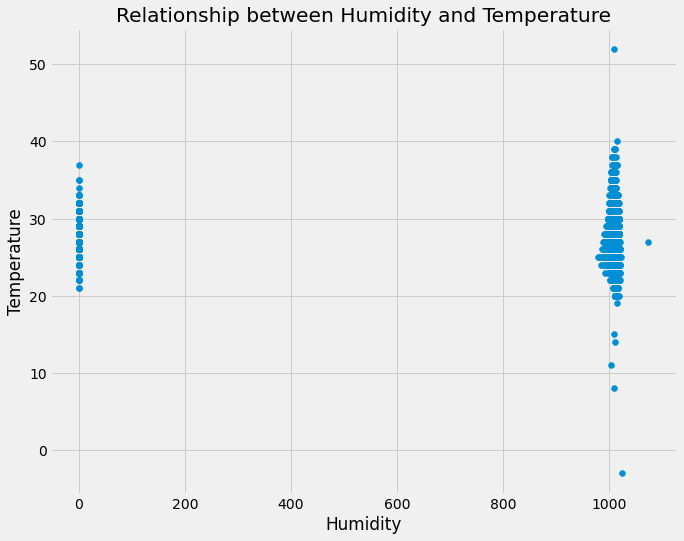

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

plt.scatter(df["sea_level_pressure"], df["temperature"])
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title("Relationship between Humidity and Temperature")

Text(0.5, 1.0, 'Temperature vs Predicted Temperature')

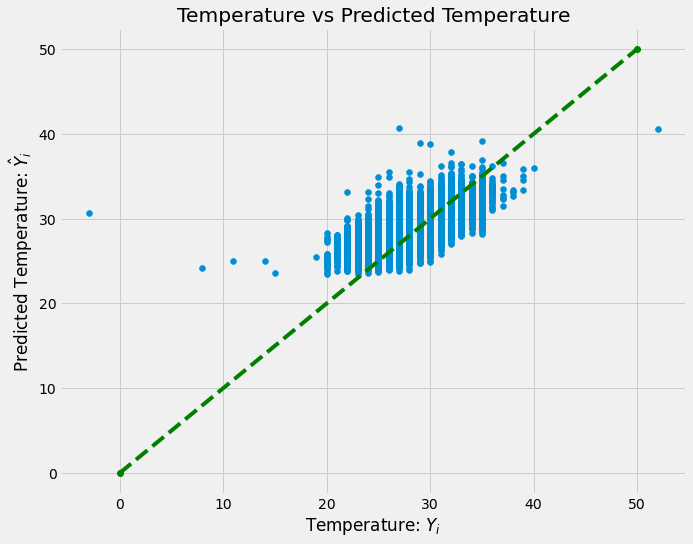

In [20]:
plt.figure(figsize=(10,8))


plt.scatter(df["temperature"], linear_model.predict(X))
plt.plot([0, 50], [0, 50], '--go')
plt.xlabel("Temperature: $Y_i$")
plt.ylabel("Predicted Temperature: $\hat{Y}_i$")
plt.title("Temperature vs Predicted Temperature")

In [21]:
mean_squared_error = np.mean((df["temperature"] - linear_model.predict(X))**2)
mean_squared_error

2.541065377549633

In [22]:
linear_model.score(X, df["temperature"])

0.5156921713874774